### Task 2: Data Preprocessing and Sentiment Labeling

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# nltk data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nitai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nitai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nitai\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
# load the data
df = pd.read_csv('youtube_comments.csv')
print(f"Initial Shape: {df.shape}")
df.head()

Initial Shape: (66803, 3)


,video_id,video_title,comment
0,TcMBFSGVi1c,Avengers Endgame Trailer,Furei a boca com espinho de peixe
1,TcMBFSGVi1c,Avengers Endgame Trailer,Sou budista Jesus Cristo
2,TcMBFSGVi1c,Avengers Endgame Trailer,Is there any chance of iron man returning back...
3,TcMBFSGVi1c,Avengers Endgame Trailer,TOMORROW. DOOM COMES FOR US ALL.
4,TcMBFSGVi1c,Avengers Endgame Trailer,saw this movie again today


In [3]:
# basic cleaning
def expand_contractions(text):
    # dictionary of common contractions
    contractions = {
        "can't": "cannot", "won't": "will not", "n't": " not",
        "i'm": "i am", "it's": "it is", "i've": "i have",
        "don't": "do not", "doesn't": "does not", "didn't": "did not",
        "wasn't": "was not", "weren't": "were not", "haven't": "have not",
        "hasn't": "has not", "hadn't": "had not", "shouldn't": "should not",
        "couldn't": "could not", "wouldn't": "would not"
    }
    for contraction, expanded in contractions.items():
        text = text.replace(contraction, expanded)
    return text

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = expand_contractions(text.strip())
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['cleaned_comment'] = df['comment'].apply(clean_text)

df = df[df['cleaned_comment'] != ""]
print(f"Shape after basic cleaning: {df.shape}")

Shape after basic cleaning: (65493, 4)


In [4]:
# stopwords removal and lemmatization
stop_words = set(stopwords.words('english'))
# negation words are important for sentiment, so we remove them from the stopword
negation_words = {'not', 'no', 'nor', 'neither', 'never', 'none', "isn't", "wasn't", "aren't", "weren't", "don't", "doesn't", "didn't", "can't", "couldn't", "shouldn't", "won't", "wouldn't"}
stop_words = stop_words - negation_words

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['processed_comment'] = df['cleaned_comment'].apply(preprocess_text)

df = df[df['processed_comment'] != ""]
print(f"Shape after preprocessing: {df.shape}")

Shape after preprocessing: (64208, 5)


In [5]:
# sentiment labeling using VADER
# we are useing VADER to generate labels
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    compound = score['compound']
    if compound >= 0.05:
        return 1
    elif compound <= -0.05:
        return -1
    else:
        return 0

df['sentiment'] = df['comment'].apply(get_sentiment)
print(df['sentiment'].value_counts())

sentiment
 1    25190
 0    23508
-1    15510
Name: count, dtype: int64


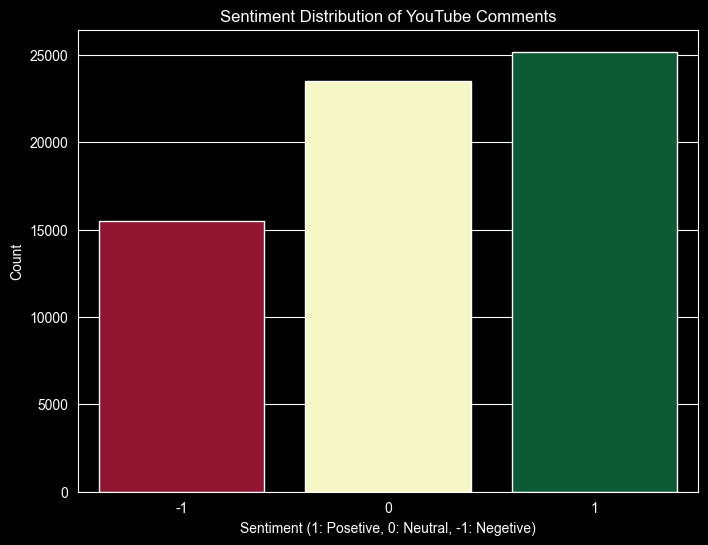

In [6]:
# visualize Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', hue='sentiment', data=df, palette='RdYlGn', legend=False)
plt.title('Sentiment Distribution of YouTube Comments')
plt.xlabel('Sentiment (1: Posetive, 0: Neutral, -1: Negetive)')
plt.ylabel('Count')
plt.show()

In [7]:
# preprocessed data
output_file = 'preprocessed_youtube_comments.csv'
df.to_csv(output_file, index=False)
df.head()

,video_id,video_title,comment,cleaned_comment,processed_comment,sentiment
0,TcMBFSGVi1c,Avengers Endgame Trailer,Furei a boca com espinho de peixe,furei a boca com espinho de peixe,furei boca com espinho de peixe,0
1,TcMBFSGVi1c,Avengers Endgame Trailer,Sou budista Jesus Cristo,sou budista jesus cristo,sou budista jesus cristo,0
2,TcMBFSGVi1c,Avengers Endgame Trailer,Is there any chance of iron man returning back...,is there any chance of iron man returning back...,chance iron man returning back present,1
3,TcMBFSGVi1c,Avengers Endgame Trailer,TOMORROW. DOOM COMES FOR US ALL.,tomorrow doom comes for us all,tomorrow doom come u,-1
4,TcMBFSGVi1c,Avengers Endgame Trailer,saw this movie again today,saw this movie again today,saw movie today,0
